## [최종] 임대료 시각화 및 모델링

1. 2차 전처리
2. 시각화
3. 모델링

### 2차 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1차 전처리 완료된 데이터 부르기

In [2]:
rent = pd.read_csv('임대료(전처리완료)_홍영화.csv',index_col = 0)

In [3]:
rent.head(30)

,광역상권,하위상권,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기
0,도심지역,광화문,66.1,1.0,1.98,1.48,0.49,2013,1
1,도심지역,동대문,34.0,5.8,1.27,1.10,0.17,2013,1
2,도심지역,명동,249.9,7.1,2.02,1.61,0.41,2013,1
3,도심지역,서울역,59.9,5.4,2.13,1.48,0.66,2013,1
4,도심지역,종로,87.0,8.5,1.70,1.62,0.08,2013,1
5,도심지역,충무로,28.6,9.1,1.73,1.00,0.73,2013,1
6,강남지역,강남대로,128.6,4.3,1.35,1.10,0.25,2013,1
7,강남지역,도산대로,43.8,5.7,1.53,0.78,0.75,2013,1
8,강남지역,서초,30.7,18.8,1.27,1.07,0.20,2013,1
9,강남지역,신사역,75.4,7.9,2.05,1.07,0.98,2013,1


중복되는 광역상권(신촌마포지역, 영등포신촌지역) 하나로 통일

In [4]:
rent[rent['광역상권']=='영등포신촌지역']['광역상권'] = '신촌마포지역'

<ipython-input-4-2abbe1349e2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent[rent['광역상권']=='영등포신촌지역']['광역상권'] = '신촌마포지역'


In [5]:
rent[rent['광역상권']=='영등포신촌지역'].index

Int64Index([ 541,  542,  543,  544,  578,  579,  580,  581,  615,  616,  617,
             618,  652,  653,  654,  655,  688,  689,  690,  691,  725,  726,
             727,  728,  762,  763,  764,  765,  799,  800,  801,  802,  838,
             839,  840,  841,  878,  879,  880,  881,  918,  919,  920,  921,
             958,  959,  960,  961,  999, 1000, 1001, 1002, 1003, 1004, 1049,
            1050, 1051, 1052, 1053, 1054, 1099, 1100, 1101, 1102, 1103, 1104,
            1149, 1150, 1151, 1152, 1153, 1154, 1202, 1203, 1204, 1205, 1206,
            1207, 1208, 1259, 1260, 1261, 1262, 1263, 1264, 1265],
           dtype='int64')

In [6]:
rent.iloc[[ 541,  542,  543,  544,  578,  579,  580,  581,  615,  616,  617,
             618,  652,  653,  654,  655,  688,  689,  690,  691,  725,  726,
             727,  728,  762,  763,  764,  765,  799,  800,  801,  802,  838,
             839,  840,  841,  878,  879,  880,  881,  918,  919,  920,  921,
             958,  959,  960,  961,  999, 1000, 1001, 1002, 1003, 1004, 1049,
            1050, 1051, 1052, 1053, 1054, 1099, 1100, 1101, 1102, 1103, 1104,
            1149, 1150, 1151, 1152, 1153, 1154, 1202, 1203, 1204, 1205, 1206,
            1207, 1208, 1259, 1260, 1261, 1262, 1263, 1264, 1265],0] = '신촌마포지역'

In [7]:
rent['광역상권'].value_counts()

기타지역      675
강남지역      268
도심지역      219
신촌마포지역    134
Name: 광역상권, dtype: int64

3가지 지역(관악, 기타, 이외)으로 나누기

In [8]:
rent_관악 = (rent[(rent['하위상권']=='서울대입구역') | (rent['하위상권']=='신림역')])
rent_관악.head(5)

,광역상권,하위상권,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기
551,기타지역,서울대입구역,62.3,2.8,1.45,1.17,0.28,2017,1
554,기타지역,신림역,69.7,5.6,1.42,1.09,0.33,2017,1
588,기타지역,서울대입구역,62.8,1.7,1.40,1.18,0.22,2017,2
591,기타지역,신림역,70.3,5.6,1.59,1.10,0.48,2017,2
625,기타지역,서울대입구역,62.8,1.7,1.56,1.17,0.39,2017,3


In [9]:
rent_기타 = rent[(rent['광역상권']=='기타지역')&(rent['하위상권']!='서울대입구역')&(rent['하위상권']!='신림역')]
rent_기타.head(5)

,광역상권,하위상권,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기
16,기타지역,건대입구,49.3,4.4,1.65,0.97,0.68,2013,1
17,기타지역,경희대,49.3,2.8,1.50,1.15,0.35,2013,1
18,기타지역,군자,38.7,5.1,1.28,1.12,0.16,2013,1
19,기타지역,목동,30.6,4.4,1.44,1.16,0.28,2013,1
20,기타지역,사당,50.9,1.0,2.13,1.50,0.63,2013,1


In [10]:
rent_이외 = rent[rent['광역상권']!='기타지역']
rent_이외.head(5)

,광역상권,하위상권,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기
0,도심지역,광화문,66.1,1.0,1.98,1.48,0.49,2013,1
1,도심지역,동대문,34.0,5.8,1.27,1.10,0.17,2013,1
2,도심지역,명동,249.9,7.1,2.02,1.61,0.41,2013,1
3,도심지역,서울역,59.9,5.4,2.13,1.48,0.66,2013,1
4,도심지역,종로,87.0,8.5,1.70,1.62,0.08,2013,1


기타지역은 하위상권이 너무 많아서 그냥 하나로 통일

In [11]:
# 기타지역을 평균으로 묶음
rent_기타mean = rent_기타.groupby(['연도','분기','광역상권'])[['임대료','공실률','투자수익률','소득수익률','자본수익률']].mean().reset_index()
rent_기타mean.head()

,연도,분기,광역상권,임대료,공실률,투자수익률,소득수익률,자본수익률
0,2013,1,기타지역,42.576471,5.147059,1.428824,1.162353,0.266471
1,2013,2,기타지역,42.629412,5.147059,1.178824,1.177647,0.000588
2,2013,3,기타지역,41.917647,6.276471,0.653529,0.880588,-0.226471
3,2013,4,기타지역,41.876471,6.600000,1.442941,1.123529,0.319412
4,2014,1,기타지역,42.000000,7.229412,1.477647,1.117059,0.358235


In [12]:
rent_기타mean = rent_기타mean.rename(columns={"광역상권": "하위상권"})

In [13]:
rent_기타mean

,연도,분기,하위상권,임대료,공실률,투자수익률,소득수익률,자본수익률
0,2013,1,기타지역,42.576471,5.147059,1.428824,1.162353,0.266471
1,2013,2,기타지역,42.629412,5.147059,1.178824,1.177647,0.000588
2,2013,3,기타지역,41.917647,6.276471,0.653529,0.880588,-0.226471
3,2013,4,기타지역,41.876471,6.600000,1.442941,1.123529,0.319412
4,2014,1,기타지역,42.000000,7.229412,1.477647,1.117059,0.358235
5,2014,2,기타지역,42.017647,7.188235,1.664118,1.114706,0.549412
6,2014,3,기타지역,42.141176,6.841176,1.181765,0.907647,0.275294
7,2014,4,기타지역,42.147059,6.652941,1.547647,1.099412,0.447647
8,2015,1,기타지역,42.194118,6.252941,1.487647,1.101765,0.384118
9,2015,2,기타지역,42.223529,7.105882,1.521176,1.098235,0.420588


3가지 지역(관악, 기타, 이외)으로 나누고 합치기

In [14]:
rent_all = pd.concat([rent_관악,rent_이외, rent_기타mean], axis=0)
rent_all.tail()

,광역상권,하위상권,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기
29,NaN,기타지역,43.736000,7.756000,1.405600,0.780400,0.625200,2020,2
30,NaN,기타지역,43.572000,7.212000,1.337600,0.542800,0.796000,2020,3
31,NaN,기타지역,43.276000,8.168000,1.505600,0.756000,0.748400,2020,4
32,NaN,기타지역,42.750000,7.200000,1.827857,0.738929,1.089286,2021,1
33,NaN,기타지역,42.860714,7.182143,1.968571,0.731071,1.238571,2021,2


In [15]:
rent_all = rent_all.drop(['광역상권'], axis=1)

머신러닝에 사용할 데이터는 2013년~2020년

In [16]:
rent_all = rent_all[rent_all['연도'] != 2021]
rent_all

,하위상권,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기
551,서울대입구역,62.300000,2.800000,1.4500,1.1700,0.280000,2017,1
554,신림역,69.700000,5.600000,1.4200,1.0900,0.330000,2017,1
588,서울대입구역,62.800000,1.700000,1.4000,1.1800,0.220000,2017,2
591,신림역,70.300000,5.600000,1.5900,1.1000,0.480000,2017,2
625,서울대입구역,62.800000,1.700000,1.5600,1.1700,0.390000,2017,3
...,...,...,...,...,...,...,...,...
27,기타지역,43.055556,8.588889,2.2550,0.8450,1.409444,2019,4
28,기타지역,43.856000,7.572000,1.7664,0.7964,0.969600,2020,1
29,기타지역,43.736000,7.756000,1.4056,0.7804,0.625200,2020,2
30,기타지역,43.572000,7.212000,1.3376,0.5428,0.796000,2020,3


### 시각화
1. 주요지역
2. 기타지역
3. 관악지역
3. 주요+기타+관악

In [17]:
#그래프에서 마이너스 부호 보여주기 위한 글꼴 설정
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False

#### 1. 주요지역

In [18]:
rent_이외[rent_이외['광역상권']=='도심지역']['하위상권'].unique()

array(['광화문', '동대문', '명동', '서울역', '종로', '충무로', '남대문', '시청', '을지로'],
      dtype=object)

In [19]:
rent_이외[rent_이외['광역상권']=='강남지역']['하위상권'].unique()

array(['강남대로', '도산대로', '서초', '신사역', '압구정동', '청담', '테헤란로', '논현역', '압구정',
       '교대역', '남부터미널', '서래마을', '양재말죽거리', '양재역'], dtype=object)

In [20]:
rent_이외[rent_이외['광역상권']=='신촌마포지역']['하위상권'].unique()

array(['공덕역', '신촌이대', '홍대합정', '영등포역', '당산역', '망원역', '동교연남'], dtype=object)

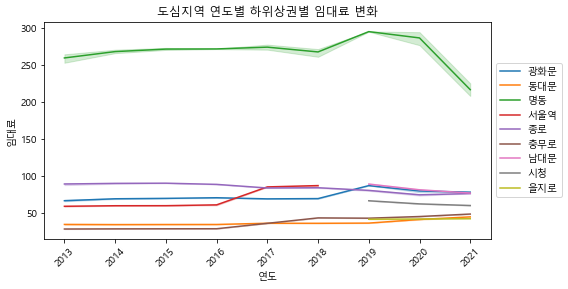

In [21]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='연도', y='임대료', hue='하위상권',data=rent_이외[rent_이외['광역상권']=='도심지역'])
plt.xticks(rotation=45)
plt.title('도심지역 연도별 하위상권별 임대료 변화')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

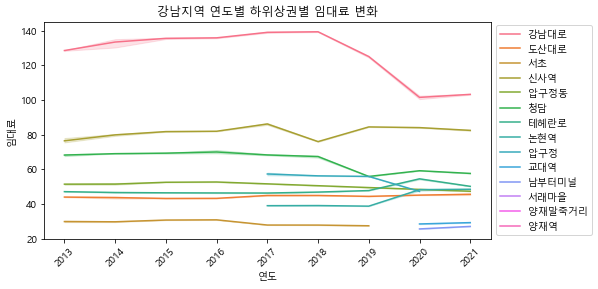

In [22]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='연도', y='임대료', hue='하위상권',data=rent_이외[rent_이외['광역상권']=='강남지역'])
plt.xticks(rotation=45)
plt.title('강남지역 연도별 하위상권별 임대료 변화')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

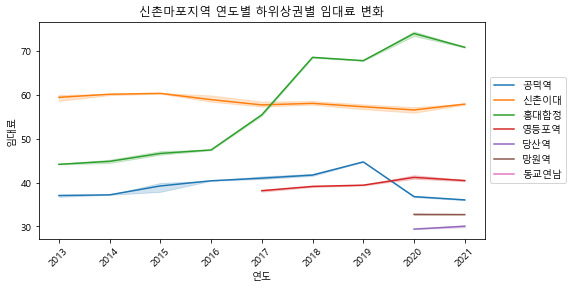

In [23]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='연도', y='임대료', hue='하위상권',data=rent_이외[rent_이외['광역상권']=='신촌마포지역'])
plt.xticks(rotation=45)
plt.title('신촌마포지역 연도별 하위상권별 임대료 변화')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

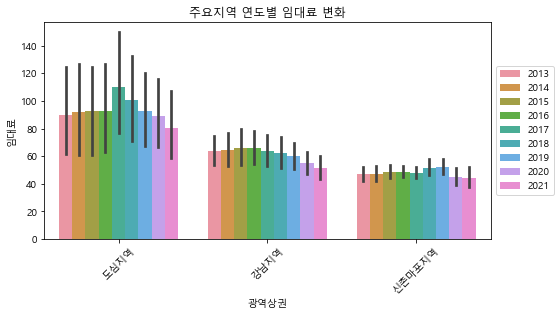

In [24]:
plt.figure(figsize=(8, 4))
sns.set_palette('crest')

g = sns.barplot(x='광역상권', y='임대료', hue='연도',data=rent_이외)
plt.xticks(rotation=45)
plt.title('주요지역 연도별 임대료 변화')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#도심지역은 2017년에 최고치, 그 이후로 점점 떨어짐, 변동폭이 큼
#강남지역은 2016년에 최고치, 그 이후로 점점 떨어짐
#신촌마포지역은 2018년, 2019년에 최고치, 그 이후로 점점 떨어짐

#### 2. 기타지역

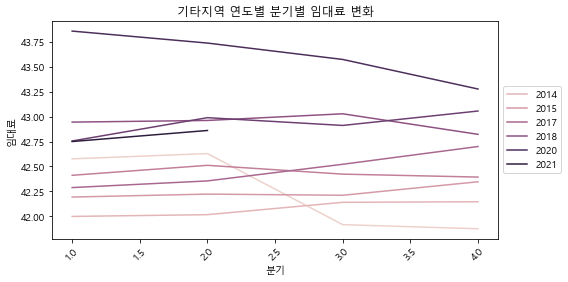

In [25]:
plt.figure(figsize=(8, 4))
g = sns.lineplot(x='분기', y='임대료',hue='연도', data=rent_기타mean)
plt.xticks(rotation=45)
plt.title('기타지역 연도별 분기별 임대료 변화')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#연도 흐름에 따라 임대료는 증가함 -> 2020년부터는 점차 하락, 2021년에 뚝 떨어짐

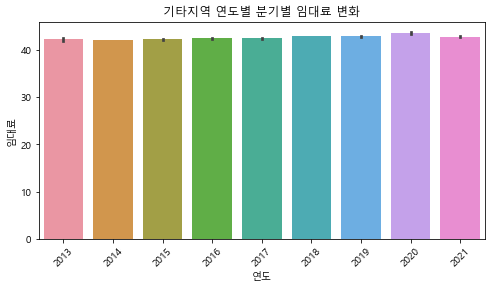

In [26]:
plt.figure(figsize=(8, 4))
sns.set_palette('crest')
g = sns.barplot(x='연도', y='임대료', data=rent_기타mean)
plt.xticks(rotation=45)
plt.title('기타지역 연도별 분기별 임대료 변화')
plt.show()

#x축만 바꿔본 그래프
#꾸준히 증가하다가 2021년 하락세

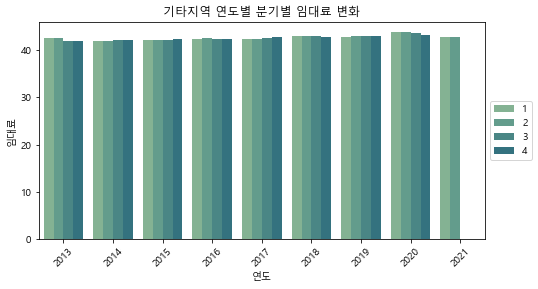

In [27]:
plt.figure(figsize=(8, 4))
sns.set_palette('crest')
g = sns.barplot(x='연도', y='임대료',hue='분기', data=rent_기타mean)
plt.xticks(rotation=45)
plt.title('기타지역 연도별 분기별 임대료 변화')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#분기로도 나눠본 그래프
#연도에 따라 조금씩 증가하다가 2020년부터 조금씩 하락세

#### 3. 관악지역

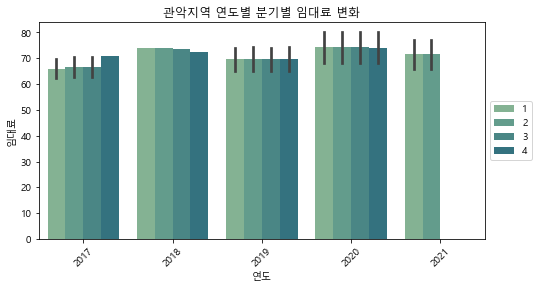

In [28]:
plt.figure(figsize=(8, 4))
sns.set_palette('crest')
g = sns.barplot(x='연도', y='임대료',hue='분기', data=rent_관악)
plt.xticks(rotation=45)
plt.title('관악지역 연도별 분기별 임대료 변화')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#

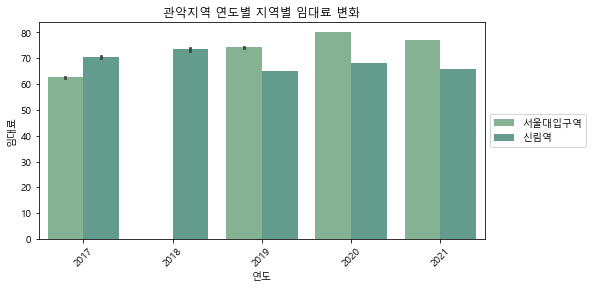

In [29]:
plt.figure(figsize=(8, 4))
sns.set_palette('crest')
g = sns.barplot(x='연도', y='임대료',hue='하위상권', data=rent_관악)
plt.xticks(rotation=45)
plt.title('관악지역 연도별 지역별 임대료 변화')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


#2019년부터는 서울대입구역이 더 비싸다.

#### 4. 관악 + 주요 + 기타

In [98]:
rent_all[(rent_all['연도']==2020)&(rent_all['분기']==1)].sort_values(by='임대료').head(10)

,하위상권,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기
992,남부터미널,25.600,4.700,1.8600,0.8000,1.0600,2020,1
991,교대역,28.500,8.700,1.8500,0.7800,1.0700,2020,1
1000,당산역,29.400,3.500,1.9200,0.8900,1.0300,2020,1
1001,망원역,33.000,1.600,1.6800,0.7300,0.9500,2020,1
999,공덕역,36.900,5.200,1.7900,0.8700,0.9200,2020,1
984,동대문,41.200,9.800,1.1500,0.7500,0.4000,2020,1
1003,영등포역,41.900,15.200,1.9300,0.7900,1.1400,2020,1
987,을지로,42.500,4.000,1.9400,0.7500,1.1900,2020,1
28,기타지역,43.856,7.572,1.7664,0.7964,0.9696,2020,1
994,도산대로,45.200,11.700,1.1900,0.5900,0.6000,2020,1


In [99]:
rent_all[(rent_all['연도']==2020)&(rent_all['분기']==1)].sort_values(by='공실률').head(10)

,하위상권,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기
1020,신림역,68.2,1.4,1.74,0.97,0.77,2020,1
1001,망원역,33.0,1.6,1.68,0.73,0.95,2020,1
982,광화문,81.7,2.3,1.17,1.06,0.11,2020,1
1000,당산역,29.4,3.5,1.92,0.89,1.03,2020,1
1016,서울대입구역,80.2,4.0,1.59,1.06,0.53,2020,1
987,을지로,42.5,4.0,1.94,0.75,1.19,2020,1
992,남부터미널,25.6,4.7,1.86,0.80,1.06,2020,1
999,공덕역,36.9,5.2,1.79,0.87,0.92,2020,1
988,종로,76.0,6.1,1.72,0.92,0.80,2020,1
989,충무로,45.9,7.2,1.72,0.73,0.99,2020,1


In [107]:
rent_all[(rent_all['연도']==2020)&(rent_all['분기']==1)].sort_values(by='투자수익률').head(10)

,하위상권,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기
984,동대문,41.2,9.8,1.15,0.75,0.40,2020,1
982,광화문,81.7,2.3,1.17,1.06,0.11,2020,1
994,도산대로,45.2,11.7,1.19,0.59,0.60,2020,1
995,신사역,84.4,10.1,1.23,0.68,0.56,2020,1
993,논현역,48.9,11.0,1.42,0.65,0.77,2020,1
996,압구정,47.2,14.7,1.51,0.64,0.86,2020,1
985,명동,296.7,7.4,1.53,0.91,0.62,2020,1
1004,홍대합정,74.5,7.7,1.56,0.78,0.78,2020,1
1016,서울대입구역,80.2,4.0,1.59,1.06,0.53,2020,1
1002,신촌이대,57.2,10.3,1.62,0.90,0.72,2020,1


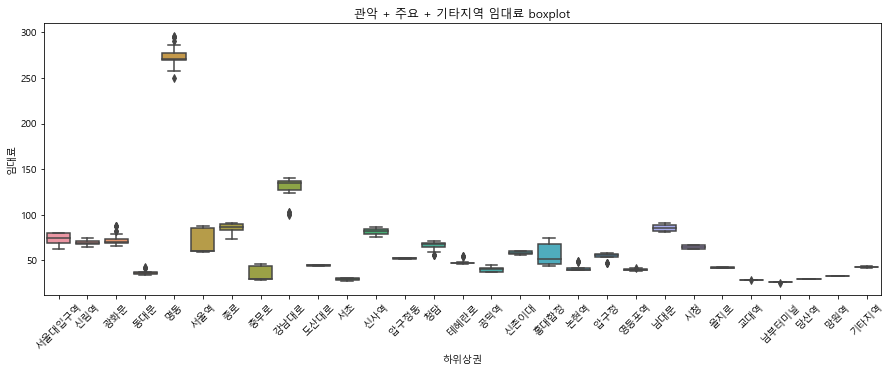

In [30]:
plt.figure(figsize=(15, 5))
sns.set_palette('crest')

g = sns.boxplot(x='하위상권', y='임대료', data=rent_all)
plt.xticks(rotation=45)
plt.title('관악 + 주요 + 기타지역 임대료 boxplot')
plt.show()

#변동이 큰 곳은 서울역, 충무로, 홍대합정

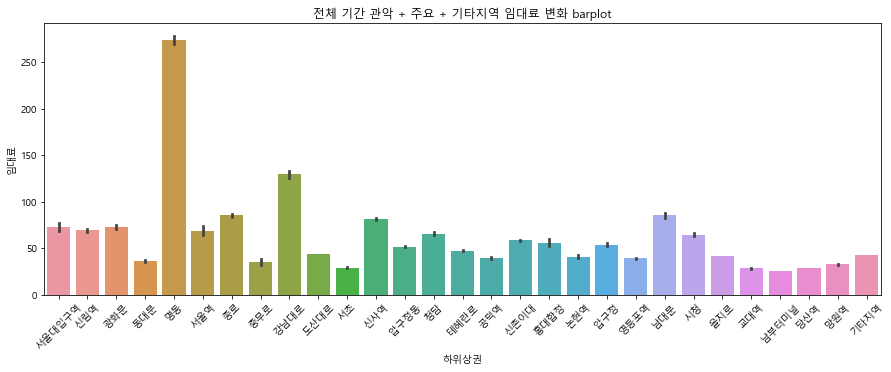

In [102]:
plt.figure(figsize=(15,5))
g = sns.barplot(x='하위상권', y='임대료', data=rent_all)
plt.xticks(rotation=45)
plt.title('전체 기간 관악 + 주요 + 기타지역 임대료 변화 barplot')
plt.show()

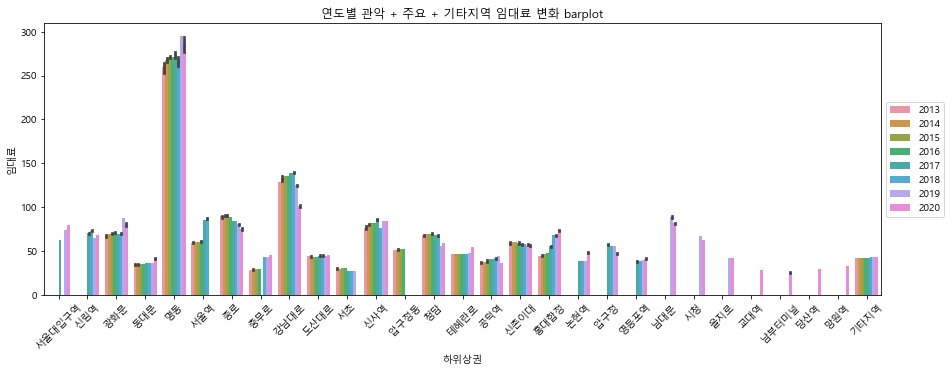

In [31]:
plt.figure(figsize=(15,5))
g = sns.barplot(x='하위상권', y='임대료', hue='연도', data=rent_all)
plt.xticks(rotation=45)
plt.title('연도별 관악 + 주요 + 기타지역 임대료 변화 barplot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#서울대입구역, 명동, 동대문, 서울역, 충무로, 테헤란로, 홍대합정, 기타지역은 증가하는 추세이다.
#특히 명동, 홍대합정의 임대료 증가가 눈에 띈다.

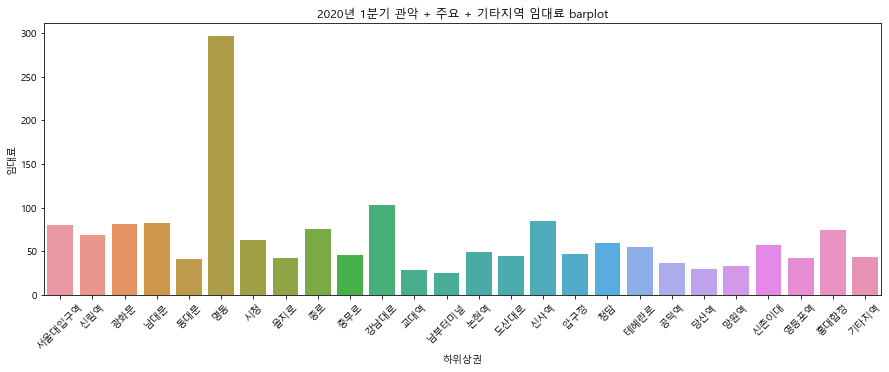

In [105]:
plt.figure(figsize=(15, 5))
g = sns.barplot(x='하위상권', y='임대료', data=rent_all[(rent_all['연도']==2020)&(rent_all['분기']==1)])
plt.xticks(rotation=45)
plt.title('2020년 1분기 관악 + 주요 + 기타지역 임대료 barplot')

plt.show()

<AxesSubplot:title={'center':'임대료 corr heatmap'}>

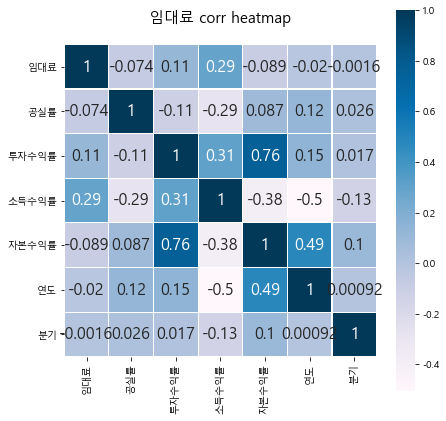

In [34]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(7,7)) 
plt.title("임대료 corr heatmap", y = 1.05, size = 15) 
sns.heatmap(rent_all.corr(), linewidths = 0.1, vmax = 1.0, square = True, 
            cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


C:\Users\1306h\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'임대료 Histogram'}, xlabel='임대료', ylabel='Density'>

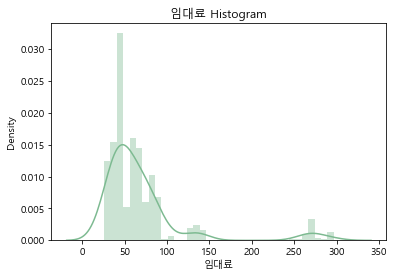

In [35]:
# 타깃값 임대료 분포도 확인
plt.title('임대료 Histogram')
sns.distplot(rent_all['임대료'])

# 결과
# 데이터 값의 분포가 중심에서 왼쪽으로 치우친 형태
# 정규 분포에서 벗어나 있음

C:\Users\1306h\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log Transformed 임대료 Histogram'}, xlabel='임대료', ylabel='Density'>

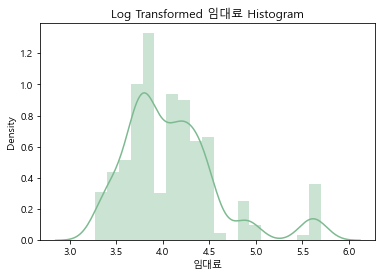

In [36]:
# 결과값을 로그 변환 후 임대료 값 분포도 확인
plt.title('Log Transformed 임대료 Histogram')
log_SalePrice = np.log1p(rent_all['임대료'])
sns.distplot(log_SalePrice)

# 결과
# 딱히 정규분포가 되지 않음

C:\Users\1306h\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Root Transformed 임대료 Histogram'}, xlabel='임대료', ylabel='Density'>

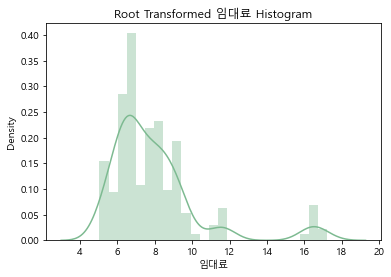

In [37]:
# 결과값을 루트 변환 후 임대료 값 분포도 확인
plt.title('Root Transformed 임대료 Histogram')
root_SalePrice = np.sqrt(rent_all['임대료'])
sns.distplot(root_SalePrice)

# 결과
# 딱히 정규분포가 되지 않음

#### 로그변환한 임대료 값으로 모델링 진행하기로 함(pycaret 실행 후 로그변환)
#### 로그변환했음에도 정규분포가 되지 않았다는 것을 한계점에서 언급하면 좋을 듯

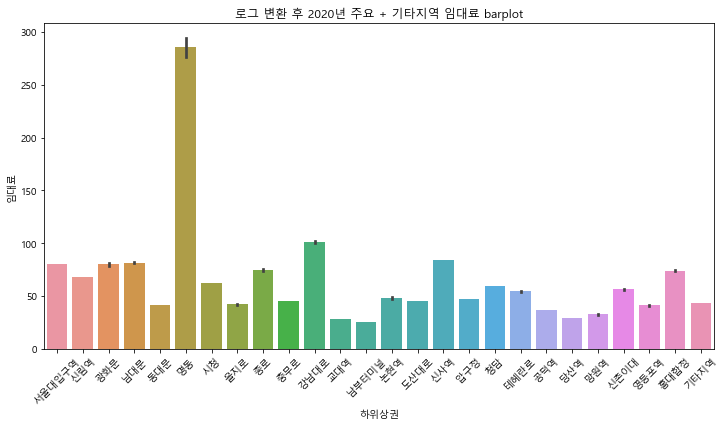

In [38]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='하위상권', y='임대료', data=rent_all[rent_all['연도']==2020])
plt.xticks(rotation=45)
plt.title('로그 변환 후 2020년 주요 + 기타지역 임대료 barplot')

plt.show()

#로그 변환 후, 지역별 차이가 줄어듦

## 모델링

1. 모델링을 위한 데이터 처리
2. pycaret
3. 개별 모델

In [39]:
#RMSLE, RMSE, MAE값 구하는 함수
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y,pred):
    r2_val = r2_score(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y,pred)
    print('R2: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(r2_val,rmse_val,mae_val))

### 1. 모델링을 위한 데이터 처리

- 하위상권을 get_dummies로 인코딩
- 2013~2019년 데이터를 train으로, 2020년 데이터를 test로 분할

In [40]:
rent_all_oh = pd.get_dummies(rent_all, columns=["하위상권"])
rent_all_oh.tail()

,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기,하위상권_강남대로,하위상권_공덕역,하위상권_광화문,...,하위상권_신촌이대,하위상권_압구정,하위상권_압구정동,하위상권_영등포역,하위상권_을지로,하위상권_종로,하위상권_청담,하위상권_충무로,하위상권_테헤란로,하위상권_홍대합정
27,43.055556,8.588889,2.2550,0.8450,1.409444,2019,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,43.856000,7.572000,1.7664,0.7964,0.969600,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,43.736000,7.756000,1.4056,0.7804,0.625200,2020,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,43.572000,7.212000,1.3376,0.5428,0.796000,2020,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,43.276000,8.168000,1.5056,0.7560,0.748400,2020,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
train = rent_all_oh[rent_all_oh['연도'] != 2020]
train.head(5)

,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기,하위상권_강남대로,하위상권_공덕역,하위상권_광화문,...,하위상권_신촌이대,하위상권_압구정,하위상권_압구정동,하위상권_영등포역,하위상권_을지로,하위상권_종로,하위상권_청담,하위상권_충무로,하위상권_테헤란로,하위상권_홍대합정
551,62.3,2.8,1.45,1.17,0.28,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554,69.7,5.6,1.42,1.09,0.33,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
588,62.8,1.7,1.40,1.18,0.22,2017,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
591,70.3,5.6,1.59,1.10,0.48,2017,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
625,62.8,1.7,1.56,1.17,0.39,2017,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
test = rent_all_oh[rent_all_oh['연도'] == 2020]
test.head(5)

,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기,하위상권_강남대로,하위상권_공덕역,하위상권_광화문,...,하위상권_신촌이대,하위상권_압구정,하위상권_압구정동,하위상권_영등포역,하위상권_을지로,하위상권_종로,하위상권_청담,하위상권_충무로,하위상권_테헤란로,하위상권_홍대합정
1016,80.2,4.0,1.59,1.06,0.53,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,68.2,1.4,1.74,0.97,0.77,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1066,80.2,4.0,1.70,1.05,0.65,2020,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1070,68.2,1.4,1.62,0.96,0.66,2020,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1116,80.2,4.7,1.64,0.82,0.82,2020,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. pycaret

pycaret으로 성능이 좋은 모델 둘러보기

In [43]:
# pip install pycaret

In [44]:
# pip install catboost

In [45]:
# pip install -U scikit-learn

In [46]:
from pycaret.classification import *
from pycaret.regression import *

In [47]:
reg = setup(data= train,
            target= '임대료',
            )

,Description,Value
0,session_id,3512
1,Target,임대료
2,Original Data,"(522, 36)"
3,Missing Values,False
4,Numeric Features,33
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(365, 44)"


In [48]:
best_5_l = compare_models(sort='MAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0063,4.4881,2.0254,0.9980,0.0273,0.0149,0.0540
dt,Decision Tree Regressor,1.5842,15.1076,3.6643,0.9931,0.0597,0.0252,0.0050
rf,Random Forest Regressor,2.3496,17.4736,4.1016,0.9921,0.0639,0.0383,0.0640
xgboost,Extreme Gradient Boosting,2.4076,16.6495,3.9852,0.9923,0.0640,0.0399,0.1350
br,Bayesian Ridge,3.4033,26.3150,5.0613,0.9887,0.0761,0.0560,0.0050
lr,Linear Regression,3.4131,26.4377,5.0755,0.9887,0.0764,0.0561,0.3530
huber,Huber Regressor,3.5134,40.2277,6.1930,0.9835,0.0984,0.0568,0.0100
gbr,Gradient Boosting Regressor,4.2283,33.1073,5.6873,0.9859,0.0973,0.0758,0.0170
ridge,Ridge Regression,4.5861,42.0397,6.3323,0.9839,0.0951,0.0761,0.0040
par,Passive Aggressive Regressor,5.6013,62.4316,7.3389,0.9777,0.1594,0.0990,0.0050


In [49]:
blended_l = blend_models(estimator_list = best_5_l, fold = 5, optimize = 'MAE')
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, test)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.7176,9.2469,3.0409,0.9973,0.0468,0.0273
1,2.2976,17.7519,4.2133,0.9947,0.0620,0.0359
2,1.4147,5.1113,2.2608,0.9982,0.0448,0.0261
3,2.3499,17.4425,4.1764,0.9952,0.0590,0.0333
4,2.5186,17.1010,4.1353,0.9897,0.0613,0.0389
Mean,2.0597,13.3307,3.5654,0.9950,0.0548,0.0323
SD,0.4206,5.1943,0.7868,0.0030,0.0074,0.0049


In [50]:
pred_esb_l.head(100)
#맨 왼쪽 임대료가 실제값, 맨 오른쪽 Label이 예측값

,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기,하위상권_강남대로,하위상권_공덕역,하위상권_광화문,...,하위상권_압구정,하위상권_압구정동,하위상권_영등포역,하위상권_을지로,하위상권_종로,하위상권_청담,하위상권_충무로,하위상권_테헤란로,하위상권_홍대합정,Label
1016,80.2,4.0,1.59,1.06,0.53,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,63.857468
1020,68.2,1.4,1.74,0.97,0.77,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,67.344454
1066,80.2,4.0,1.70,1.05,0.65,2020,2,0,0,0,...,0,0,0,0,0,0,0,0,0,63.758774
1070,68.2,1.4,1.62,0.96,0.66,2020,2,0,0,0,...,0,0,0,0,0,0,0,0,0,67.532343
1116,80.2,4.7,1.64,0.82,0.82,2020,3,0,0,0,...,0,0,0,0,0,0,0,0,0,63.725057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,29.4,5.7,1.31,0.84,0.47,2020,4,0,0,0,...,0,0,0,0,0,0,0,0,0,46.966448
1151,32.6,1.8,1.30,0.70,0.60,2020,4,0,0,0,...,0,0,0,0,0,0,0,0,0,48.189994
1152,55.7,10.7,1.67,0.81,0.86,2020,4,0,0,0,...,0,0,0,0,0,0,0,0,0,56.828097
1153,40.8,11.8,1.54,0.73,0.82,2020,4,0,0,0,...,0,0,1,0,0,0,0,0,0,37.866700


In [51]:
print('pycaret 상위 5개 모델 blend')
evaluate_regr(pred_esb_l['임대료'], pred_esb_l['Label'])

pycaret 상위 5개 모델 blend
R2: 0.921, RMSE: 13.608, MAE: 10.201


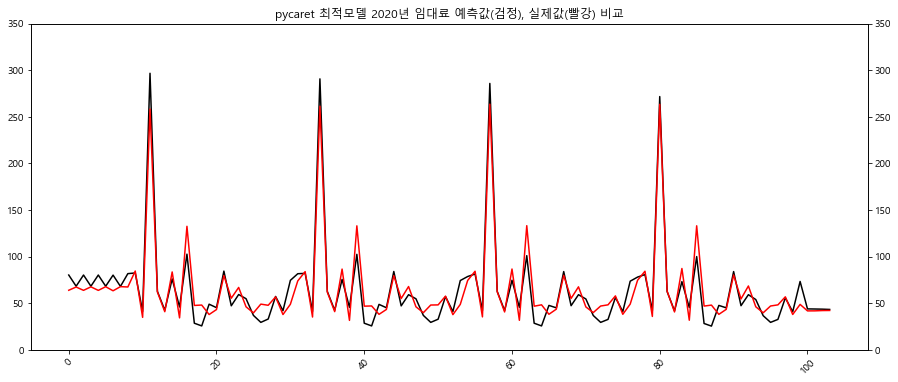

In [52]:
fig, ax1 = plt.subplots(figsize=(15, 6))
line1 = ax1.plot(pred_esb_l['임대료'].values,color='black')
plt.xticks(rotation=45)
plt.ylim(0 ,350)

ax2 = ax1.twinx()
line2 = ax2.plot(pred_esb_l['Label'].values, color='red')
plt.xticks(rotation=45)
plt.ylim(0 ,350)

plt.title('pycaret 최적모델 2020년 임대료 예측값(검정), 실제값(빨강) 비교')
plt.show()


### 개별 모델링 진행

1. LinearRegression
2. DecisionTreeRegressor
3. RandomForestRegressor
4. GradientBoostingRegressor
5. XGBoost
6. Ridge
7. Lasso
8. 혼합모델

In [53]:
#학습과 테스트 셋 직접 분리
#임대료는 로그변환

X_train = train.iloc[:,1:] #2013~2019년 피처
X_test = test.iloc[:,1:]  #2020년 피처
y_train = np.log1p(train['임대료']) #2013~2019년 타겟(임대료)
y_test =  np.log1p(test['임대료']) #2020년 타겟(임대료)

### 1. 결정트리, 랜덤포레스트

In [54]:
# 2개의 ML 알고리즘 사용해서 학습/예측/평가 수행

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

#선형회귀, 결정트리, 랜덤 포레스트
#random_state=11 고정
lr_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state=11)
rf_reg = RandomForestRegressor(random_state=11)

#LinearRegression 학습/예측/평가
lr_reg.fit(X_train, y_train)
lr_pred = lr_reg.predict(X_test)
print('LinearRegression')
evaluate_regr(y_test,lr_pred)
print('')

#DecisionTreeRegressor 학습/예측/평가
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)
print('DecisionTreeRegressor')
evaluate_regr(y_test,dt_pred)
print('')

#RandomForestRegressor 학습/예측/평가
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
print('RandomForestRegressor')
evaluate_regr(y_test,rf_pred)


#결과
# LinearRegression
# R2: 0.547, RMSE: 0.324, MAE: 0.215

# DecisionTreeRegressor
# R2: 0.874, RMSE: 0.171, MAE: 0.122

# RandomForestRegressor
# R2: 0.744, RMSE: 0.244, MAE: 0.169

LinearRegression
R2: 0.547, RMSE: 0.324, MAE: 0.215

DecisionTreeRegressor
R2: 0.874, RMSE: 0.171, MAE: 0.122

RandomForestRegressor
R2: 0.744, RMSE: 0.244, MAE: 0.169


#### 결정트리 최적 파라미터 찾기

In [55]:
from sklearn.model_selection import GridSearchCV

df_reg = DecisionTreeRegressor(random_state=11)

param_grid = {
    "max_depth":[10, 20, 30, 40, 50,],
    "max_features":[10,11,12,13,14]
}

#param_grid = {'criterion':['mse','friedman_mse','mae'], 'max_depth':[None,2,3,4,5,6], 'max_leaf_nodes':[None,2,3,4,5,6,7], 'min_samples_split':[2,3,4,5,6], 'min_samples_leaf':[1,2,3], max_features:[None,'sqrt','log2',3,4,5]}


grid = GridSearchCV(df_reg, param_grid=param_grid, cv=3, scoring='r2') #디폴트로 cv=3, 회귀에서 디폴트로 scoring='r2'

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

#결과
# {'max_depth': 50, 'max_features': 12}
# 0.9015567415418834

{'max_depth': 30, 'max_features': 12}
0.9032073873846141


In [56]:
#튜닝된 하이퍼 파라미터로 재학습 및 예측/평가
#GridSearchCV로 찾은 최적의 하이퍼 파라미터를
#결정트리에 적용해서 예측 수행
dt_reg = DecisionTreeRegressor(max_depth=30, max_features=12,random_state=11)

#DecisionTreeRegressor 학습/예측/평가
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)
print('최적 하이퍼 파라미터 적용한 DecisionTreeRegressor')
evaluate_regr(y_test,dt_pred)


#결과
# 최적 하이퍼 파라미터 적용한 DecisionTreeRegressor
# R2: 0.714, RMSE: 0.257, MAE: 0.179

최적 하이퍼 파라미터 적용한 DecisionTreeRegressor
R2: 0.714, RMSE: 0.257, MAE: 0.179


#### 랜덤포레스트 최적 파라미터 찾기

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[50,70,80,100,200],
    "max_depth":[10, 50, 60, 70],
    "max_features":[12,14,16,20,24]
}

rf_reg = RandomForestRegressor(random_state=11)

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(X_train, y_train)
print('최적 하이퍼 파라미터: \n', rf_reg_tuned.best_params_)
print('최적 예측 정확도: \n', rf_reg_tuned.best_score_)

#결과
# 최적 하이퍼 파라미터: 
#  {'max_depth': 50, 'max_features': 16, 'n_estimators': 100}
# 최적 예측 정확도: 
#  0.910243747619794

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:   11.3s remaining:    0.5s


최적 하이퍼 파라미터: 
 {'max_depth': 50, 'max_features': 16, 'n_estimators': 100}
최적 예측 정확도: 
 0.910243747619794


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   12.0s finished


In [58]:
#튜닝된 하이퍼 파라미터로 재학습 및 예측/평가
#GridSearchCV로 찾은 최적의 하이퍼 파라미터를
#랜덤 포레스트에 적용해서 예측 수행

#위 결과의 최적 하이퍼 파라미터를 다 입력해서
#RandomForestClassifier 초기화시키고 예측 성능 측정
rf_reg = RandomForestRegressor(n_estimators =100, max_depth=50, \
                                max_features=16 , random_state=11, n_jobs=-1)

rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

print('최적 하이퍼 파라미터 적용한 RandomForestRegressor')
evaluate_regr(y_test,rf_pred)

#결과
# 최적 하이퍼 파라미터 적용한 RandomForestRegressor
# R2: 0.680, RMSE: 0.272, MAE: 0.188

최적 하이퍼 파라미터 적용한 RandomForestRegressor
R2: 0.680, RMSE: 0.272, MAE: 0.188


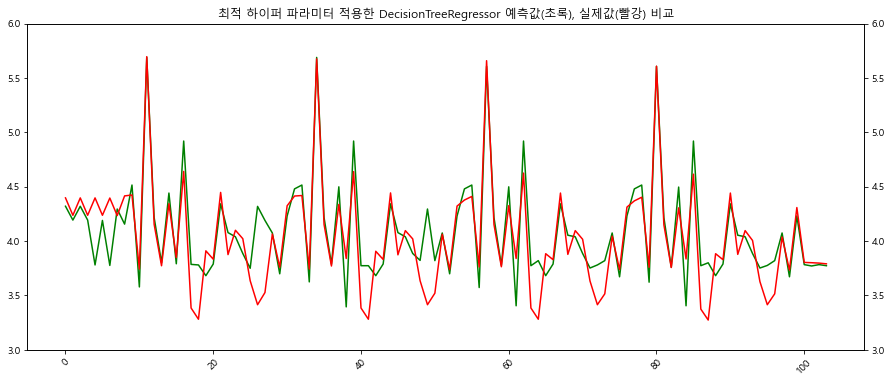

In [59]:
fig, ax1 = plt.subplots(figsize=(15, 6))
line1 = ax1.plot(dt_pred,color='green')
plt.xticks(rotation=45)
plt.ylim(3 ,6)

ax2 = ax1.twinx()
line2 = ax2.plot(y_test.values, color='red')
plt.xticks(rotation=45)
plt.ylim(3 ,6)

plt.title('최적 하이퍼 파라미터 적용한 DecisionTreeRegressor 예측값(초록), 실제값(빨강) 비교')
plt.show()


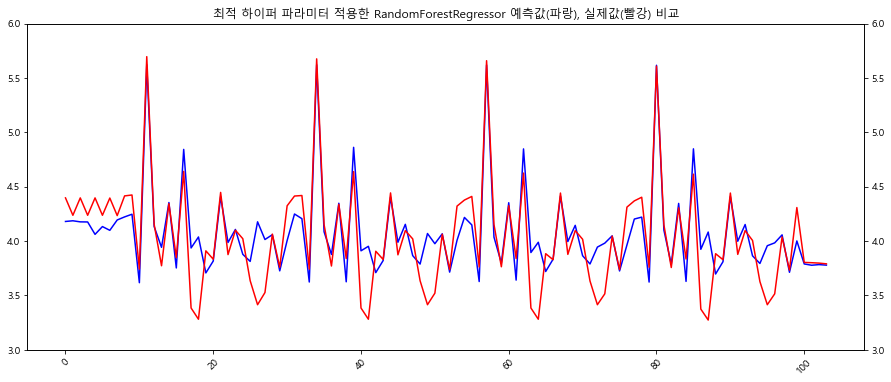

In [60]:
fig, ax1 = plt.subplots(figsize=(15, 6))
line1 = ax1.plot(rf_pred, color='blue')
plt.xticks(rotation=45)
plt.ylim(3 ,6)


ax2 = ax1.twinx()
line2 = ax2.plot(y_test.values, color='red')
plt.xticks(rotation=45)
plt.ylim(3 ,6)

plt.title('최적 하이퍼 파라미터 적용한 RandomForestRegressor 예측값(파랑), 실제값(빨강) 비교')
plt.show()


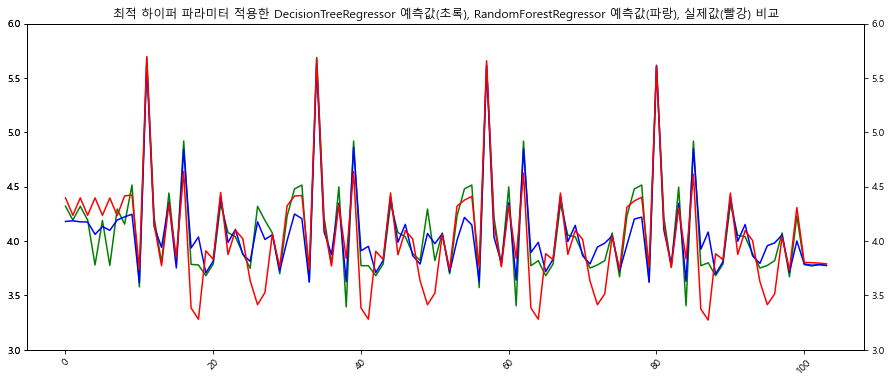

In [61]:
fig, ax1 = plt.subplots(figsize=(15, 6))
line1 = ax1.plot(dt_pred,color='green')
plt.xticks(rotation=45)
plt.ylim(3 ,6)

ax2 = ax1.twinx()
line2 = ax2.plot(rf_pred, color='blue')
plt.xticks(rotation=45)
plt.ylim(3 ,6)

ax3 = ax2.twinx()
line3 = ax3.plot(y_test.values, color='red')
plt.xticks(rotation=45)
plt.ylim(3 ,6)

plt.title('최적 하이퍼 파라미터 적용한 DecisionTreeRegressor 예측값(초록), RandomForestRegressor 예측값(파랑), 실제값(빨강) 비교')
plt.show()


### 2. GradientBoostingRegressor

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=11)
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)

print('GradientBoostingRegressor')
evaluate_regr(y_test,gb_pred)

#결과
# GradientBoostingRegressor
# R2: 0.664, RMSE: 0.279, MAE: 0.187

GradientBoostingRegressor
R2: 0.664, RMSE: 0.279, MAE: 0.187


In [63]:
from sklearn.model_selection import GridSearchCV

params = {
     'n_estimators': [100,500],
     'learning_rate': [0.05,0.1]
}

gb_reg = GradientBoostingRegressor(random_state=11)
grid_cv = GridSearchCV(gb_reg, param_grid = params, cv = 2, verbose=1)#, scoring='neg_mean_squared_error')
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

# 최적 하이퍼 파라미터:
#  {'learning_rate': 0.1, 'n_estimators': 100}
# 최고 예측 정확도: 0.8298

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 100}
최고 예측 정확도: 0.8298


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.9s finished


In [64]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=11, learning_rate = 0.1, n_estimators=100)
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)

print('최적 하이퍼 파라미터 적용한 GradientBoostingRegressor')
evaluate_regr(y_test,gb_pred)

#결과
# 최적 하이퍼 파라미터 적용한 GradientBoostingRegressor
# R2: 0.664, RMSE: 0.279, MAE: 0.187

최적 하이퍼 파라미터 적용한 GradientBoostingRegressor
R2: 0.664, RMSE: 0.279, MAE: 0.187


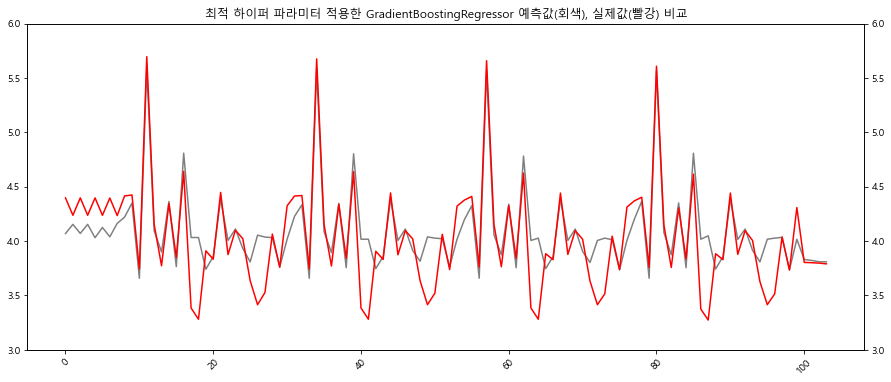

In [65]:
fig, ax1 = plt.subplots(figsize=(15, 6))
line1 = ax1.plot(gb_pred,color='grey')
plt.xticks(rotation=45)
plt.ylim(3 ,6)

ax2 = ax1.twinx()
line2 = ax2.plot(y_test.values, color='red')
plt.xticks(rotation=45)
plt.ylim(3 ,6)

plt.title('최적 하이퍼 파라미터 적용한 GradientBoostingRegressor 예측값(회색), 실제값(빨강) 비교')
plt.show()

### 3. XGBoost Regression

In [66]:
# #파이썬 xgboost를 사용하려면 DMatrix 타입으로 변환해야 함
# #변환된 학습용, 테스트용 데이터 세트 생성
# dtrain = xgb.DMatrix(data=X_train, label=y_train)
# dtest = xgb.DMatrix(data=X_test, label=y_test)

In [67]:
import xgboost as xgb
from xgboost import plot_importance

xgb_reg = xgb.XGBRegressor(random_state=11) 

xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)

print('XGBoost')
evaluate_regr(y_test,xgb_pred)

# XGBoost
# R2: 0.627, RMSE: 0.294, MAE: 0.182

XGBoost
R2: 0.627, RMSE: 0.294, MAE: 0.182


In [68]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,200,300]
    ,'learning_rate': [.05, .1]
}

xgb_reg = xgb.XGBRegressor(random_state=11)
grid_cv = GridSearchCV(xgb_reg, param_grid = params, cv = 2, verbose=1)#, scoring='neg_mean_squared_error')
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

# 최적 하이퍼 파라미터:
#  {'learning_rate': 0.05, 'n_estimators': 100}
# 최고 예측 정확도: 0.8560

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 100}
최고 예측 정확도: 0.8560


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.5s finished


In [69]:
xgb_reg = xgb.XGBRegressor(random_state=11, learning_rate = 0.05, n_estimators=100)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)

print('최적 하이퍼 파라미터 적용한 XGBoost')
evaluate_regr(y_test,xgb_pred)

# 최적 하이퍼 파라미터 적용한 XGBoost
# R2: 0.653, RMSE: 0.284, MAE: 0.198

최적 하이퍼 파라미터 적용한 XGBoost
R2: 0.653, RMSE: 0.284, MAE: 0.198


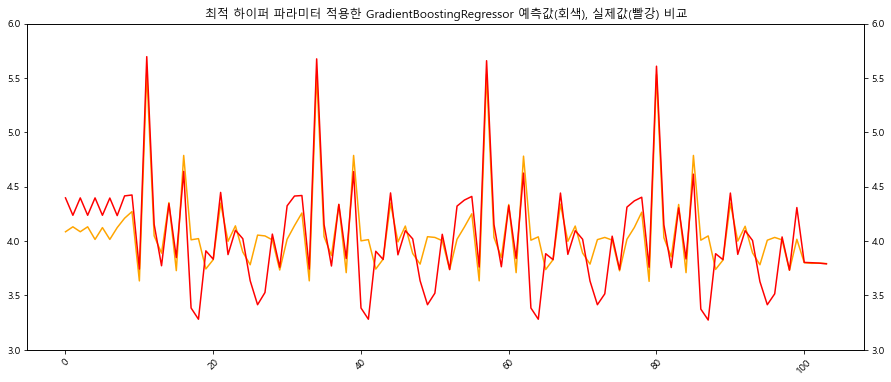

In [70]:
fig, ax1 = plt.subplots(figsize=(15, 6))
line1 = ax1.plot(xgb_pred,color='orange')
plt.xticks(rotation=45)
plt.ylim(3 ,6)

ax2 = ax1.twinx()
line2 = ax2.plot(y_test.values, color='red')
plt.xticks(rotation=45)
plt.ylim(3 ,6)

plt.title('최적 하이퍼 파라미터 적용한 GradientBoostingRegressor 예측값(회색), 실제값(빨강) 비교')
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

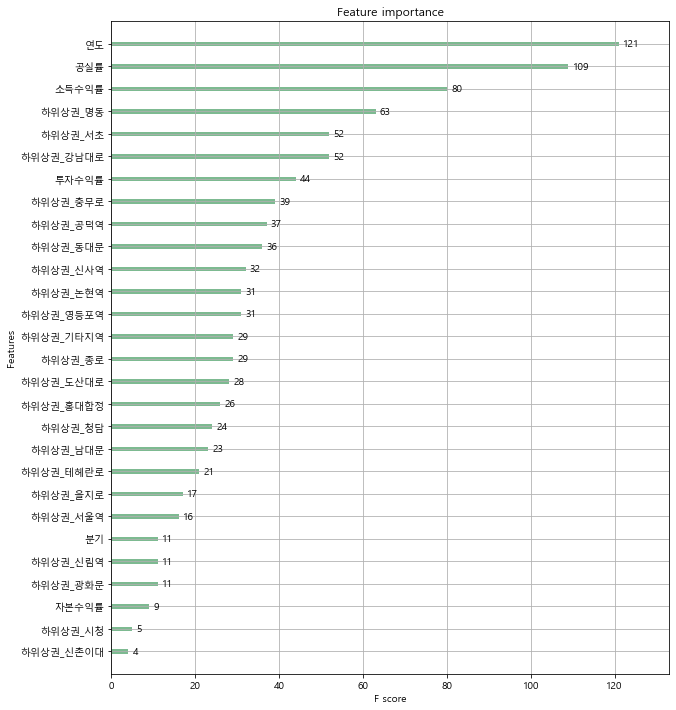

In [71]:
#피처 중요도 막대그래프
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_reg, ax=ax)

#피처 중요도: 연도>공실률>소득수익률

### 4. 릿지, 라쏘

In [72]:
from sklearn.linear_model import Ridge, Lasso

ridge_reg = Ridge(random_state=11)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(random_state=11)
lasso_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

print('Ridge')
evaluate_regr(y_test,ridge_pred)
print('')
print('Lasso')
evaluate_regr(y_test,lasso_pred)

# #Ridge
# R2: 0.562, RMSE: 0.318, MAE: 0.210

# Lasso
# R2: -0.021, RMSE: 0.486, MAE: 0.373

Ridge
R2: 0.562, RMSE: 0.318, MAE: 0.210

Lasso
R2: -0.021, RMSE: 0.486, MAE: 0.373


### 5. ExtraTreesRegressor

In [73]:
from sklearn.ensemble import ExtraTreesRegressor

et_reg = ExtraTreesRegressor(random_state=11)
et_reg.fit(X_train, y_train)
et_pred = et_reg.predict(X_test)

print('ExtraTreesRegressor')
evaluate_regr(y_test,et_pred)

# ExtraTreesRegressor
# R2: 0.893, RMSE: 0.157, MAE: 0.118

ExtraTreesRegressor
R2: 0.893, RMSE: 0.157, MAE: 0.118


In [74]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators":[None, 1,5,10,20],
    "max_depth":[10,20,30,40,50],
    "max_features":[12,14,16,20,24]
}

et_reg = ExtraTreesRegressor(random_state=11)
grid_cv = GridSearchCV(et_reg, param_grid = params, cv = 2, verbose=1)#, scoring='neg_mean_squared_error')
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

#  {'max_depth': 20, 'max_features': 16, 'n_estimators': 1}
# 최고 예측 정확도: 0.8874

Fitting 2 folds for each of 125 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


최적 하이퍼 파라미터:
 {'max_depth': 20, 'max_features': 16, 'n_estimators': 1}
최고 예측 정확도: 0.8874


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.8s finished


In [75]:
et_reg = ExtraTreesRegressor(max_depth=20,max_features=16, random_state=11, n_estimators=1)
et_reg.fit(X_train, y_train)
et_pred = et_reg.predict(X_test)

print('최적 하이퍼 파라미터 적용한 ExtraTreesRegressor')
evaluate_regr(y_test,et_pred)


# 최적 하이퍼 파라미터 적용한 ExtraTreesRegressor
# R2: 0.746, RMSE: 0.243, MAE: 0.179

최적 하이퍼 파라미터 적용한 ExtraTreesRegressor
R2: 0.746, RMSE: 0.243, MAE: 0.179


### 6. 혼합모델

In [76]:
# 앞에서 구한 RandomForestRegressor 모델(40%)과 랜덤 ExtraTreesRegressor 모델(60%) 혼합
# 개별 모델과 혼합 모델의 RMSE 추출

# 최종 혼합 모델과 개별 모델의 RMSE 값 출력하는 함수 생성
      
#random_state=11만 적용한 RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=11)
rf_reg.fit(X_train, y_train)

#random_state=11만 적용한 ExtraTreesRegressor
et_reg = ExtraTreesRegressor(random_state=11)
et_reg.fit(X_train, y_train)

# 개별 모델 예측
rf_pred = rf_reg.predict(X_test)
et_pred = et_reg.predict(X_test)


# 개별 모델 예측값 혼합으로 최종 예측값 도출
mix_pred = 0.15*rf_pred + 0.85*et_pred

print('혼합모델')
evaluate_regr(y_test, mix_pred)


# 혼합모델
# R2: 0.878, RMSE: 0.168, MAE: 0.123

혼합모델
R2: 0.878, RMSE: 0.168, MAE: 0.123


## 정리

### pycaret 상위 5개 모델 blend
- R2: 0.926, RMSE: 13.173, MAE: 9.764

###  LinearRegression
- R2: 0.547, RMSE: 0.324, MAE: 0.215

###  DecisionTreeRegressor
- R2: 0.874, RMSE: 0.171, MAE: 0.122
- 최적 하이퍼 파라미터 적용한 DecisionTreeRegressor
- R2: 0.857, RMSE: 0.182, MAE: 0.139

###  RandomForestRegressor
- R2: 0.744, RMSE: 0.244, MAE: 0.169
- 최적 하이퍼 파라미터 적용한 RandomForestRegressor
- R2: 0.680, RMSE: 0.272, MAE: 0.188

###  GradientBoostingRegressor
- R2: 0.664, RMSE: 0.279, MAE: 0.187
- 최적 하이퍼 파라미터 적용한 GradientBoostingRegressor
- R2: 0.664, RMSE: 0.279, MAE: 0.187

###  XGBoost
- R2: 0.627, RMSE: 0.294, MAE: 0.182
- 최적 하이퍼 파라미터 적용한 XGBoost
- R2: 0.653, RMSE: 0.284, MAE: 0.198.

###  Ridge
- R2: 0.562, RMSE: 0.318, MAE: 0.210

###  Lasso
- R2: -0.021, RMSE: 0.486, MAE: 0.37

###  ExtraTreesRegressor
- R2: 0.893, RMSE: 0.157, MAE: 0.118
- 최적 하이퍼 파라미터 적용한 ExtraTreesRegressor
- R2: 0.746, RMSE: 0.243, MAE: 0.179

## 최종 모델: pycaret 상위 5개 모델 blend
- R2: 0.926, RMSE: 13.173, MAE: 9.764

In [77]:
pred_esb_l

,임대료,공실률,투자수익률,소득수익률,자본수익률,연도,분기,하위상권_강남대로,하위상권_공덕역,하위상권_광화문,...,하위상권_압구정,하위상권_압구정동,하위상권_영등포역,하위상권_을지로,하위상권_종로,하위상권_청담,하위상권_충무로,하위상권_테헤란로,하위상권_홍대합정,Label
1016,80.200,4.000,1.5900,1.0600,0.5300,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,63.857468
1020,68.200,1.400,1.7400,0.9700,0.7700,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,67.344454
1066,80.200,4.000,1.7000,1.0500,0.6500,2020,2,0,0,0,...,0,0,0,0,0,0,0,0,0,63.758774
1070,68.200,1.400,1.6200,0.9600,0.6600,2020,2,0,0,0,...,0,0,0,0,0,0,0,0,0,67.532343
1116,80.200,4.700,1.6400,0.8200,0.8200,2020,3,0,0,0,...,0,0,0,0,0,0,0,0,0,63.725057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,73.300,8.600,1.4300,0.7700,0.6600,2020,4,0,0,0,...,0,0,0,0,0,0,0,0,1,48.691828
28,43.856,7.572,1.7664,0.7964,0.9696,2020,1,0,0,0,...,0,0,0,0,0,0,0,0,0,41.719242
29,43.736,7.756,1.4056,0.7804,0.6252,2020,2,0,0,0,...,0,0,0,0,0,0,0,0,0,41.763237
30,43.572,7.212,1.3376,0.5428,0.7960,2020,3,0,0,0,...,0,0,0,0,0,0,0,0,0,42.077209


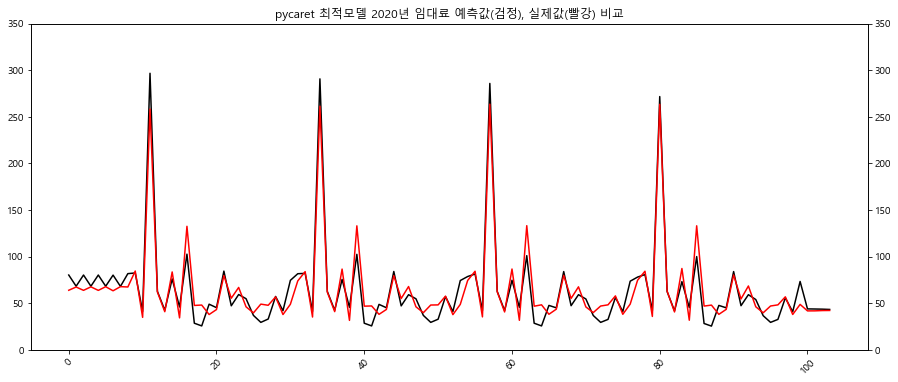

In [78]:
fig, ax1 = plt.subplots(figsize=(15, 6))
line1 = ax1.plot(pred_esb_l['임대료'].values,color='black')
plt.xticks(rotation=45)
plt.ylim(0 ,350)

ax2 = ax1.twinx()
line2 = ax2.plot(pred_esb_l['Label'].values, color='red')
plt.xticks(rotation=45)
plt.ylim(0 ,350)

plt.title('pycaret 최적모델 2020년 임대료 예측값(검정), 실제값(빨강) 비교')
plt.show()

In [79]:
df = X_test.copy()
df['지역'] = None

In [80]:
df

,공실률,투자수익률,소득수익률,자본수익률,연도,분기,하위상권_강남대로,하위상권_공덕역,하위상권_광화문,하위상권_교대역,...,하위상권_압구정,하위상권_압구정동,하위상권_영등포역,하위상권_을지로,하위상권_종로,하위상권_청담,하위상권_충무로,하위상권_테헤란로,하위상권_홍대합정,지역
1016,4.000,1.5900,1.0600,0.5300,2020,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,None
1020,1.400,1.7400,0.9700,0.7700,2020,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,None
1066,4.000,1.7000,1.0500,0.6500,2020,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,None
1070,1.400,1.6200,0.9600,0.6600,2020,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,None
1116,4.700,1.6400,0.8200,0.8200,2020,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,8.600,1.4300,0.7700,0.6600,2020,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,None
28,7.572,1.7664,0.7964,0.9696,2020,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,None
29,7.756,1.4056,0.7804,0.6252,2020,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,None
30,7.212,1.3376,0.5428,0.7960,2020,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,None


In [81]:
for i in range(len(df)):
    for j in df.iloc[:,6:].columns:
        if df[j].iloc[i] ==1:
            df['지역'].iloc[i] = j

In [82]:
df['지역'].unique()

array(['하위상권_서울대입구역', '하위상권_신림역', '하위상권_광화문', '하위상권_남대문', '하위상권_동대문',
       '하위상권_명동', '하위상권_시청', '하위상권_을지로', '하위상권_종로', '하위상권_충무로',
       '하위상권_강남대로', '하위상권_교대역', '하위상권_남부터미널', '하위상권_논현역', '하위상권_도산대로',
       '하위상권_신사역', '하위상권_압구정', '하위상권_청담', '하위상권_테헤란로', '하위상권_공덕역',
       '하위상권_당산역', '하위상권_망원역', '하위상권_신촌이대', '하위상권_영등포역', '하위상권_홍대합정',
       '하위상권_기타지역'], dtype=object)

In [83]:
df

,공실률,투자수익률,소득수익률,자본수익률,연도,분기,하위상권_강남대로,하위상권_공덕역,하위상권_광화문,하위상권_교대역,...,하위상권_압구정,하위상권_압구정동,하위상권_영등포역,하위상권_을지로,하위상권_종로,하위상권_청담,하위상권_충무로,하위상권_테헤란로,하위상권_홍대합정,지역
1016,4.000,1.5900,1.0600,0.5300,2020,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,하위상권_서울대입구역
1020,1.400,1.7400,0.9700,0.7700,2020,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,하위상권_신림역
1066,4.000,1.7000,1.0500,0.6500,2020,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,하위상권_서울대입구역
1070,1.400,1.6200,0.9600,0.6600,2020,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,하위상권_신림역
1116,4.700,1.6400,0.8200,0.8200,2020,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,하위상권_서울대입구역
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,8.600,1.4300,0.7700,0.6600,2020,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,하위상권_홍대합정
28,7.572,1.7664,0.7964,0.9696,2020,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,하위상권_기타지역
29,7.756,1.4056,0.7804,0.6252,2020,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,하위상권_기타지역
30,7.212,1.3376,0.5428,0.7960,2020,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,하위상권_기타지역


In [85]:
df['임대료_예측값'] = pred_esb_l['Label']

In [86]:
#필요한 칼럼만 선택
final = df[['연도','분기','지역','임대료_예측값']]

In [87]:
#가독성을 위해 지역 값에서 '하위상권_'은 삭제
final['지역'] = final['지역'].str.split('_').str[1]

In [88]:
final

,연도,분기,지역,임대료_예측값
1016,2020,1,서울대입구역,63.857468
1020,2020,1,신림역,67.344454
1066,2020,2,서울대입구역,63.758774
1070,2020,2,신림역,67.532343
1116,2020,3,서울대입구역,63.725057
...,...,...,...,...
1154,2020,4,홍대합정,48.691828
28,2020,1,기타지역,41.719242
29,2020,2,기타지역,41.763237
30,2020,3,기타지역,42.077209


In [89]:
final_관악 = final[(final['지역']=='서울대입구역')|(final['지역']=='신림역')]

In [90]:
final_관악

,연도,분기,지역,임대료_예측값
1016,2020,1,서울대입구역,63.857468
1020,2020,1,신림역,67.344454
1066,2020,2,서울대입구역,63.758774
1070,2020,2,신림역,67.532343
1116,2020,3,서울대입구역,63.725057
1120,2020,3,신림역,67.673308
1166,2020,4,서울대입구역,63.296079
1170,2020,4,신림역,67.738291


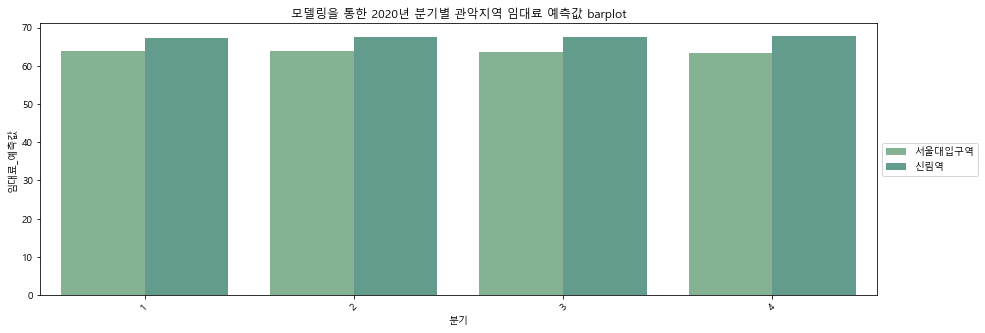

In [91]:
plt.figure(figsize=(15,5))
g = sns.barplot(x='분기', y='임대료_예측값', hue='지역', data=final_관악)
plt.xticks(rotation=45)
plt.title('모델링을 통한 2020년 분기별 관악지역 임대료 예측값 barplot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#모든 분기에서 서울대입구역이 신림역에 비해 높을 것으로 예상됨.
#하지만 점점 그 차이는 줄어들 것으로 예상됨.

In [92]:
final2 = final[(final['분기']==2)]
final3 = final[(final['분기']==3)]
final4 = final[(final['분기']==4)]

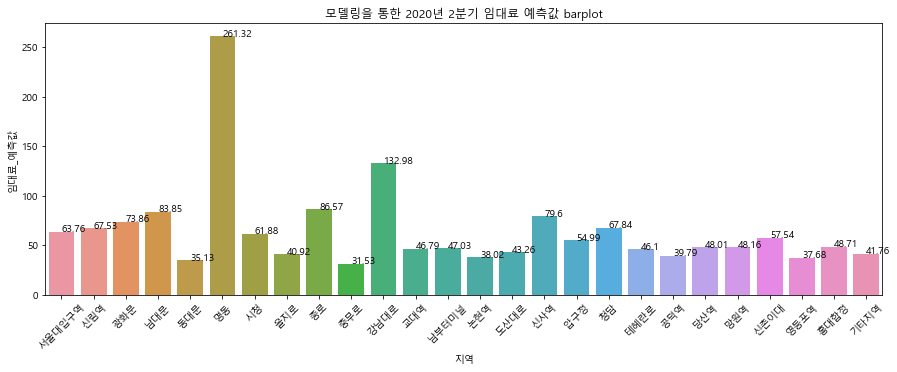

In [93]:
plt.figure(figsize=(15,5))
g = sns.barplot(x='지역', y='임대료_예측값', data=final2)
for i in range(final2.shape[0]):
    g.text(x=i, y=final2['임대료_예측값'].iloc[i], s=np.round(final2['임대료_예측값'].iloc[i],2))
    
plt.xticks(rotation=45)
plt.title('모델링을 통한 2020년 2분기 임대료 예측값 barplot')
plt.show()
#2분기만 보기

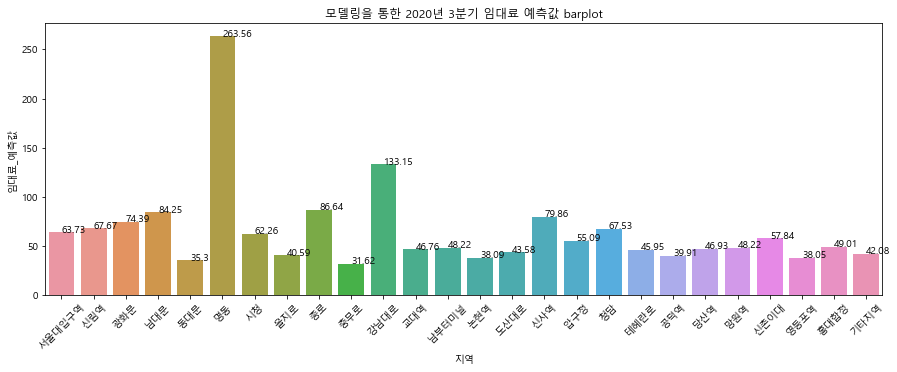

In [94]:
plt.figure(figsize=(15,5))
g = sns.barplot(x='지역', y='임대료_예측값', data=final3)
for i in range(final3.shape[0]):
    g.text(x=i, y=final3['임대료_예측값'].iloc[i], s=np.round(final3['임대료_예측값'].iloc[i],2))
    
plt.xticks(rotation=45)
plt.title('모델링을 통한 2020년 3분기 임대료 예측값 barplot')
plt.show()
#3분기만 보기

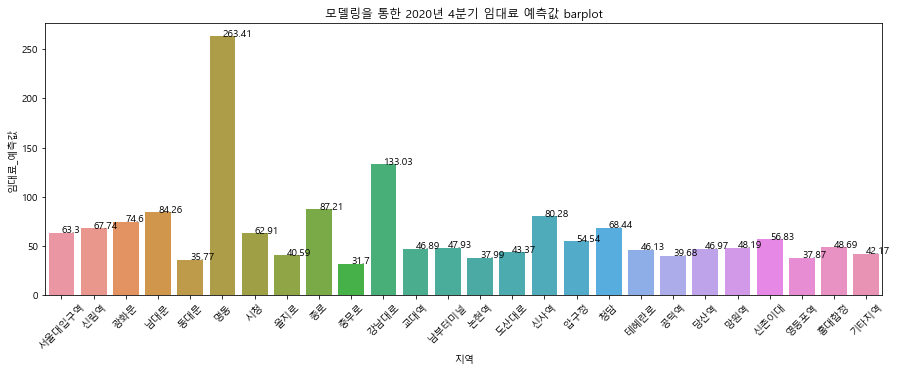

In [95]:
plt.figure(figsize=(15,5))
g = sns.barplot(x='지역', y='임대료_예측값', data=final4)
for i in range(final4.shape[0]):
    g.text(x=i, y=final4['임대료_예측값'].iloc[i], s=np.round(final4['임대료_예측값'].iloc[i],2))
    
plt.xticks(rotation=45)
plt.title('모델링을 통한 2020년 4분기 임대료 예측값 barplot')
plt.show()
#4분기만 보기